# Lab 5. Natural Language Processing. Unsupervised Learning

In [1]:
# Some IPython magic
# Put these at the top of every notebook, here nbagg is used for interactive plots
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sys
print(sys.version)
print(sys.version_info)

print("Hello world")

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
Hello world


## Natural Language Processing.
NLP refers to processing text data. This could refer to a wide range of tasks, from very simple ones, like searching for a pattern, to very complex ones, like text summarization, or automated translation.

### Feature Extraction
In order to apply Machine Learning algorithms on text data, we need to figure out a way to represent the text as a set of numeric attributes.

#### Bag of Words
The simplest way to represent a text document as a vector of numbers is to count the words, and output a frequency count. Let's say we have a list of all english words, like the following:

In [2]:
# creates a wordlist, with all words, from "a" to "zygote"
import urllib.request as request
words = request.urlopen("https://svnweb.freebsd.org/csrg/share/dict/words?view=co")
wordlist = []
for w in words:
    wordlist.append(str(w.decode().strip()))
print(', '.join(wordlist[:4]) + " ... " + ', '.join(wordlist[-4:]))

a, AAA, AAAS, aardvark ... zucchini, Zulu, Zurich, zygote


In [3]:
print("Now we can convert any text to a vector of size " \
      + str(len(wordlist)))

Now we can convert any text to a vector of size 25487


For example, the text "In this lab we study Natural Language Processing and Unsupervised Learning" can be represented as a vector with almost all values equal to 0, and values of 1 in the position of the words "in", "this", etc.

This ___feature vector___ can be extracted directly from the dataset. If we have a large collection of text, we can assume that other documents will use the same vocabulary. So if we build a model for news articles, most likely those articles will not use every single word in the english language. So during the training phase of our machine learning modeling, we can use the train set to create our feature vector, we select only the words that appear in the train set. If new words appear during the test phase, we will discard them. This is a good thing to do because during training, we did not learn anything about those words. We cannot use unseen words to perform classification.

Let's start working with a dataset.

In [4]:
from sklearn.datasets import fetch_20newsgroups

# We select only 3 categories for now, feel free to change the categories
categories = [
    'rec.sport.baseball',
    'comp.graphics',
    'sci.space',
]
dataset = fetch_20newsgroups(subset='all', categories=categories, 
                              shuffle=True, random_state=42)

#dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42) #if you want all caterogies


In [5]:
# here are the attributes of the object retrieved by fetch_20newsgroups
dir(dataset)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [6]:
len(dataset.data)

2954

In [7]:
X = dataset.data
y = dataset.target
print(np.max(y))

2


In [8]:
print(dataset.data[2])

From: bradfrd2@ncar.ucar.edu (Mark Bradford)
Subject: Astro/Space Frequently Seen Acronyms
Supersedes: <space/acronyms_731394007@GZA.COM>
Organization: LifeForms Unlimited, Cephalopods
Lines: 509
Expires: 19 May 1993 04:00:04 GMT
NNTP-Posting-Host: pad-thai.aktis.com
Keywords: long space astro tla acronyms
X-Last-Updated: 1992/12/07

Archive-name: space/acronyms
Edition: 8

Acronym List for sci.astro, sci.space, and sci.space.shuttle:
Edition 8, 1992 Dec 7
Last posted: 1992 Aug 27

This list is offered as a reference for translating commonly appearing
acronyms in the space-related newsgroups.  If I forgot or botched your
favorite acronym, please let me know!  Also, if there's an acronym *not*
on this list that confuses you, drop me a line, and if I can figure
it out, I'll add it to the list.

Note that this is intended to be a reference for *frequently seen*
acronyms, and is most emphatically *not* encyclopedic.  If I incorporated
every acronym I ever saw, I'd soon run out of disk spac

In [13]:
dataset.target_names

['comp.graphics', 'rec.sport.baseball', 'sci.space']

One way to turn a text document into a feature vector is to use a frequency count of
each word in the document.  We build a large dictionary of words, and for each document
we return a vector with as many features as there are words, and for each word, we return
the  number  of  times  that  word  appears  in  the  document  (this  is  technically  called
**term frequency** , or tf for short).  Sklearn has a **[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)**  that does just that.

In [14]:
#TO DO: Transfrom the dataset into numerical feature vectors
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# X = vectorizer.fit(X)
# X = vectorizer.fit_transform(X)
X = vectorizer.fit_transform(dataset.data)
# print(vectorizer.get_feature_names())

One problem with this representation is the high frequency of common words like ”the”
or ”to” or ”and”.  Those words appear in almost all documents, so they don’t offer much information
A better way to extract features from text is to use both the **term frequency** metric and the **inverse document frequency** metric . Sklearn has a **[TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)** that does just that.

In [30]:
#TO DO: Transfrom the dataset into tf-idf feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(dataset.data)
# print(vectorizer.get_feature_names())

Now you will need to use the vectorized dataset to perfom clustering.

You will need to  use the following algorithms : [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means), [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering).

For each algorithm try to find the parameters that produce clusters as similar as possible to the real distribution of the data.

Use different metrics to evaluate the algorithms : [Rand Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html),  [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), [Homogeneity Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html), [Completness Score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score)






In [24]:
# TODO : Use the following algorithms to perform clustering on the dataset  
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score


# X = X.toarray()
print(X)
X = X.toarray()
print(X)


# TODO: setat parametri entru KMeans si Agglomerative - sa clasifice in 3 clustere

algorithms = [DBSCAN, KMeans, AgglomerativeClustering]
# algorithms = [DBSCAN, KMeans]
# algorithms = [DBSCAN]

for i, Algorithm in enumerate(algorithms):
    print(Algorithm)
    cl = Algorithm()
    print(cl.fit(X))
    
    y_pred = cl.labels_
    
    ss = silhouette_score(X, y_pred)
    print("Silhuette score:", ss)

    ar = adjusted_rand_score(y, y_pred)
    print("Adjusted rand score:", ar)
    
    hs = homogeneity_score(y, y_pred)
    print("Homogenity score:", hs)
    
    cs = completeness_score(y, y_pred)
    print("Completeness score:", cs)
    
#     print(Algorithm.__name__, ar)



  (0, 16005)	0.03911476670701421
  (0, 20495)	0.2257852229206565
  (0, 16791)	0.22738196571283126
  (0, 20066)	0.38308293499954876
  (0, 23816)	0.30639777786579936
  (0, 16802)	0.13185013120679706
  (0, 32267)	0.019557383353507107
  (0, 21318)	0.1557009692867175
  (0, 24860)	0.05974066086947828
  (0, 22240)	0.18607471172925089
  (0, 25067)	0.020087353454213884
  (0, 16682)	0.2408703208852656
  (0, 31316)	0.1030052828547653
  (0, 30646)	0.1501210013772262
  (0, 27177)	0.12289582570804546
  (0, 24757)	0.16818982191438595
  (0, 24116)	0.0787851449767248
  (0, 33612)	0.07976672505079244
  (0, 35410)	0.06754963091801924
  (0, 26363)	0.09577073374988719
  (0, 21410)	0.019617039881777144
  (0, 669)	0.06621057992017897
  (0, 20567)	0.04477259183668957
  (0, 19620)	0.027576773080315125
  (0, 24880)	0.049475989783175925
  :	:
  (2953, 12723)	0.10252980517102922
  (2953, 5443)	0.09380895843211257
  (2953, 15824)	0.1032396242073562
  (2953, 35454)	0.08362587136090786
  (2953, 25091)	0.083910741827

As you can see, high dimensional sparse vectors do not produce the best clusters.
Now, try to improve your results by using [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the dimensions of your feature vectors before applying the clustering algorithms. 





In [25]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=2, svd_solver='full')
pca = PCA()
pca.fit(X)
print(pca.singular_values_) 

[6.43819646e+00 4.51532200e+00 4.01068831e+00 ... 1.81992536e-02
 6.65031231e-03 7.32256462e-15]


Use t-SNE to produce a low-dimensional embedding of the dataset (and plot it).

In [31]:
from sklearn.manifold import TSNE
X= X.toarray()
# X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded = TSNE().fit_transform(X)
print(X_embedded)
X_embedded.shape

[[ 15.834518  -32.430485 ]
 [-54.262215   15.469375 ]
 [ 15.528027  -20.06545  ]
 ...
 [ 22.255161   -3.7894092]
 [-23.458414   33.230076 ]
 [ 36.39537   -46.438168 ]]


(2954, 2)

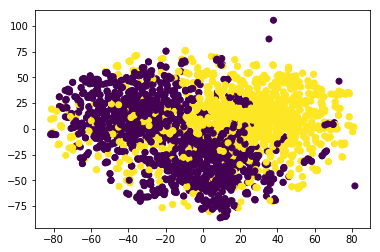

In [42]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = cl.labels_)
# print(cl.labels_[:100])

As an extra exercise, try to implement kernel KMeans. Look at the KMeans course. Slide 70

In [0]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=100, noise=0.1, factor=0)

In [0]:
from sklearn.metrics.pairwise import rbf_kernel


k = 2
# TODO : assign points to random clusters
y = 
dist = np.zeros((X.shape[0], k))

        
# TODO
max_iter = 10      
for _ in range(max_iter):      
  for j in range(k):
    # TODO : get the points that are in cluster j
    X_j = 
    
    # TODO : compute the first term
          
    first_term = 
    
    # TODO : compute the second term
    
    second_term = 
      
    dist[:, j] = first_term + second_term
        
  # TODO : change the clusters
  y = np.argmin(....)

   

In [0]:
plt.scatter(X[:,0], X[:,1], c=y)